In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_squared_error
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [29]:
df = pd.read_csv('../data/cleaned_eda_data.csv', index_col= 0)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CONTACT_ID                           10005 non-null  object 
 1   no_of_sales_12M_1                    10005 non-null  float64
 2   no_of_Redemption_12M_1               10005 non-null  float64
 3   no_of_sales_12M_10K                  10005 non-null  float64
 4   no_of_Redemption_12M_10K             10005 non-null  float64
 5   no_of_funds_sold_12M_1               10005 non-null  float64
 6   no_of_funds_redeemed_12M_1           10005 non-null  float64
 7   no_of_fund_sales_12M_10K             10005 non-null  float64
 8   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 9   no_of_assetclass_sold_12M_1          10005 non-null  float64
 10  no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 11  no_of_assetclass_sales_12M_1

In [31]:
adviser_lookup = {
        idx: contact_id 
        for idx, contact_id in enumerate(df['CONTACT_ID'])
        }

In [32]:
adviser_lookup[10]

'85102150753418532658'

In [33]:
### Remove unnecessary columns

In [34]:
df = df.drop(['CustomerID', 'CONTACT_ID', 'Firm ID', 'Office ID'], axis=1) 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_sales_12M_10K                  10005 non-null  float64
 3   no_of_Redemption_12M_10K             10005 non-null  float64
 4   no_of_funds_sold_12M_1               10005 non-null  float64
 5   no_of_funds_redeemed_12M_1           10005 non-null  float64
 6   no_of_fund_sales_12M_10K             10005 non-null  float64
 7   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 8   no_of_assetclass_sold_12M_1          10005 non-null  float64
 9   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 10  no_of_assetclass_sales_12M_10K       10005 non-null  float64
 11  no_of_assetclass_Redemption_

In [36]:
### convert objects into numbers - using get_dummies converting categorical data into numbers.

In [37]:
final_base_df = pd.get_dummies(df, columns=['Channel', 'Sub channel'])

In [38]:
final_base_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_sales_12M_10K                  10005 non-null  float64
 3   no_of_Redemption_12M_10K             10005 non-null  float64
 4   no_of_funds_sold_12M_1               10005 non-null  float64
 5   no_of_funds_redeemed_12M_1           10005 non-null  float64
 6   no_of_fund_sales_12M_10K             10005 non-null  float64
 7   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 8   no_of_assetclass_sold_12M_1          10005 non-null  float64
 9   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 10  no_of_assetclass_sales_12M_10K       10005 non-null  float64
 11  no_of_assetclass_Redemption_

In [39]:
##HENCEFORTH WE WOULD USE final_base_df

In [40]:
final_base_df.to_csv('../data/final_eda_base_data.csv')

In [41]:
## prepare the test train split data set

In [42]:
X = final_base_df.drop(['sales_2019', 'new_fund_2019'], axis=1)
y = final_base_df['sales_2019']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

<AxesSubplot:>

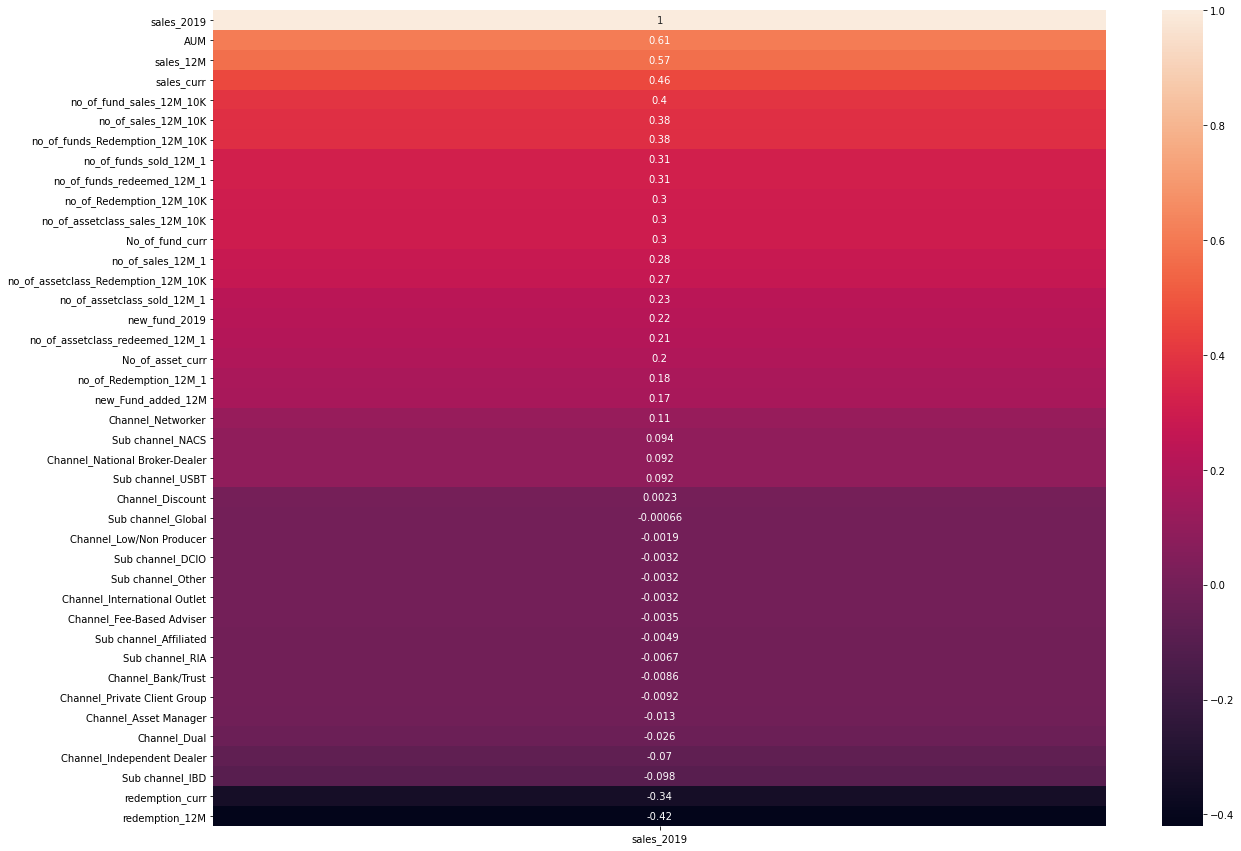

In [44]:
plt.figure(figsize = (20,15))
sns.heatmap(final_base_df.corr()[['sales_2019']].sort_values(by = 'sales_2019', ascending = False), annot= True)

In [18]:
###Baseline

In [19]:
### EDA on the dataframe to see the co-relations and do a comprehensive data analysis

In [20]:
missing_diagrams = {
    'heatmap' : True , 'dendrogram' : True, 'matrix' : True, 'bar' : True ,
}

In [21]:
profile = ProfileReport(final_base_df, title ='Nuveen Profile report', missing_diagrams = missing_diagrams)

In [22]:
#profile.to_file(output_file = "nuveen_profiling.html").

In [45]:
#Bar graph to show sales shares by Firms - some firms sell a lot while other do not sell anything!

<AxesSubplot:ylabel='Firm name'>

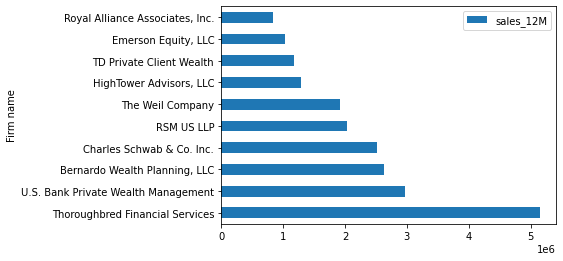

In [46]:
final_base_df.groupby('Firm name')[['sales_12M']].mean().nlargest(10, 'sales_12M').plot(kind = 'barh')

In [47]:
#Bar graph to show sales shares of 2019 by Firms - again a very unbalanced set

<AxesSubplot:ylabel='Firm name'>

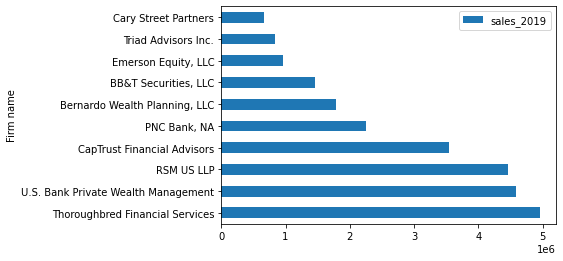

In [48]:
final_base_df.groupby('Firm name')[['sales_2019']].mean().nlargest(10, 'sales_2019').plot(kind = 'barh')

<AxesSubplot:ylabel='Channel'>

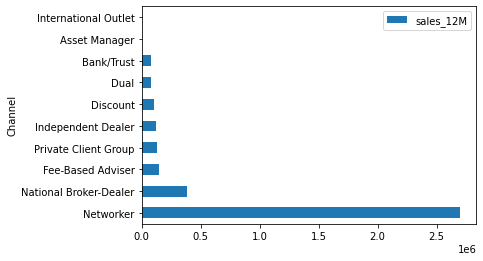

In [49]:
df.groupby('Channel')[['sales_12M']].mean().nlargest(10, 'sales_12M').plot(kind = 'barh')

<AxesSubplot:ylabel='Channel'>

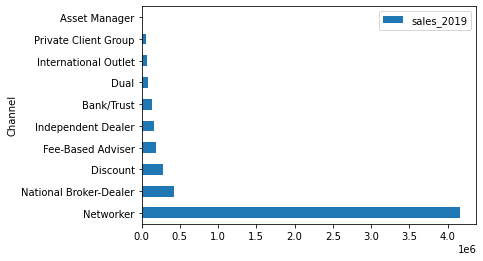

In [50]:
df.groupby('Channel')[['sales_2019']].mean().nlargest(10, 'sales_2019').plot(kind = 'barh')